# ___Text Preprocessing___
---

In [1]:
# Packages / libraries

import os #provides functions for interacting with the operating system

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Twitter Sentiment Data/tweet_train.csv')
test = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Twitter Sentiment Data/tweet_test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.shape

(31962, 3)

In [5]:
test.shape

(17197, 2)

## ___Basic Feature Extraction___

### ___Number of Words___

In [6]:
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
train[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


In [99]:
from collections import Counter
t = 'this is the textfile, and it is used to take words and count'

dict(Counter(t.split()))

{'this': 1,
 'is': 2,
 'the': 1,
 'textfile,': 1,
 'and': 2,
 'it': 1,
 'used': 1,
 'to': 1,
 'take': 1,
 'words': 1,
 'count': 1}

In [103]:
sentence = 'this is the textfile, and it is used to take words and count'

# split the sentence into words and iterate thorugh every word

counter_dict = {}
for word in sentence.lower().split():
# add the word into the counter_dict initalize with 0
  if word not in counter_dict:
    counter_dict[word] = 0
# increase its count by 1   
  counter_dict[word] += 1
    
counter_dict

{'this': 1,
 'is': 2,
 'the': 1,
 'textfile,': 1,
 'and': 2,
 'it': 1,
 'used': 1,
 'to': 1,
 'take': 1,
 'words': 1,
 'count': 1}

In [106]:
import nltk
from nltk.tokenize import word_tokenize

word_count = nltk.FreqDist(word_tokenize(sentence))
word_count

FreqDist({'is': 2, 'and': 2, 'this': 1, 'the': 1, 'textfile': 1, ',': 1, 'it': 1, 'used': 1, 'to': 1, 'take': 1, ...})

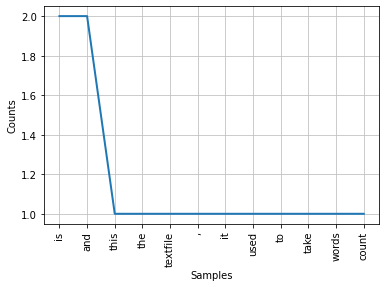

In [107]:
import matplotlib.pyplot as plt
word_count.plot()

In [109]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

text = 'this is the textfile, and it is used to take words and count'
doc = nlp(text)

#remove stopwords and punctuations
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
word_freq = Counter(words)

common_words = word_freq.most_common(5)
print (common_words)

[('textfile', 1), ('words', 1), ('count', 1)]


In [111]:
text = """Most of the outlay will be at home. No surprise there, either. While Samsung has expanded overseas, South Korea is still host to most of its factories and research engineers. """
doc = nlp(text)

#remove stopwords and punctuations
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
word_freq = Counter(words)

common_words = word_freq.most_common(5)
print (common_words)

[('outlay', 1), ('home', 1), ('surprise', 1), ('Samsung', 1), ('expanded', 1)]


### ___Number of Characters___

In [7]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


### ___Average Word Length___

In [8]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


### ___Number of Special Characters___

In [9]:
# Counting Hashtags #

train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [10]:
# Counting Mentions @

train['mentions'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
train[['tweet','mentions']].head()

,tweet,mentions
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,2
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


### ___Number of Numerics___

In [11]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


### ___Number of Uppercase words___

In [12]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


### ___Number of Stopwords___

In [13]:
# ----------- NLTK -------------- #
from nltk.corpus import stopwords

# ----------- SPACY -------------- #
from spacy.lang.en.stop_words import STOP_WORDS

In [14]:
stop = stopwords.words('english')

train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


## ___Basic Text Pre-processing___

### ___Lower case___

_The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words._

In [15]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

### ___Removing Punctuation___
_The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data._

_The following code removes this set of symbols_
```
[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]
```

In [16]:
# define punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

my_str = "Hello!!!, he said ---and went."

# remove punctuation from the string
no_punct = ""
for char in my_str:
    if char not in punctuations:
        no_punct = no_punct + char

# display the unpunctuated string
print(no_punct)

Hello he said and went


In [17]:
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Remove Whitespaces___
_To remove leading and ending spaces, you can use the strip() function_

In [18]:
input_str = " \t a string example\t "
input_str = input_str.strip()
input_str

'a string example'

In [19]:
train['tweet'] = train['tweet'].str.strip()
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Remove Accented Characters___

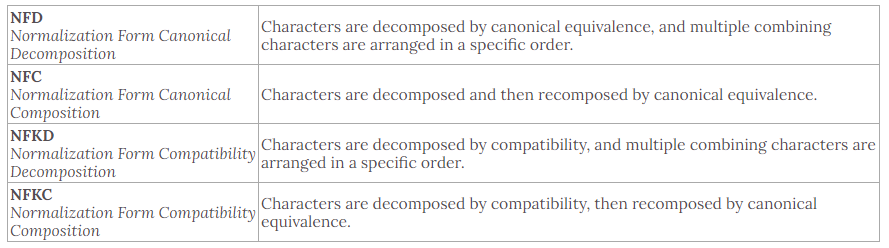
```
ａｂｃＡＢＣ ==(NFC)==> ａｂｃＡＢＣ
ａｂｃＡＢＣ ==(NFD)==> ａｂｃＡＢＣ
ａｂｃＡＢＣ ==(NFKC)==> abcABC
ａｂｃＡＢＣ ==(NFKD)==> abcABC
```

In [20]:
import unicodedata

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [21]:
train['tweet'] = train['tweet'].apply(lambda x: strip_accents(x))
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3      model i love u take with u all the time in ur  
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Remove HTML Tags___

In [22]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    return BeautifulSoup(text, "lxml").get_text().strip()

In [23]:
text = """<div><h1>Title</h1><p>A long text........ </p><a href=""> a link </a></div>"""

cleantext = remove_html_tags(text)
cleantext

'TitleA long text........  a link'

In [24]:
train['tweet'] = train['tweet'].apply(lambda x: remove_html_tags(x))
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3        model i love u take with u all the time in ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Remove Special Characters___

In [25]:
import re
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [26]:
train['tweet'] = train['tweet'].apply(lambda x: remove_special_chars(x))
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3        model i love u take with u all the time in ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Expanding Contractions___

In [27]:
contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    " u ": " you ",
    " ur ": " your ",
    " n ": " and ",
    "won't": "would not",
    'dis': 'this',
    'bak': 'back',
    'brng': 'bring'}

In [28]:
def expansion_contractions(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [29]:
train['tweet'] = train['tweet'].apply(lambda x: expansion_contractions(x))
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love you take with you all the time in ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Convert Digit to Text___

In [30]:
import inflect

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    words = text.split()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return ' '.join(word for word in new_words)

In [31]:
replace_numbers('hi this is 2')

'hi this is two'

In [32]:
train['tweet'] = train['tweet'].apply(lambda x: replace_numbers(x))
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love you take with you all the time in ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___TOKENIZATION___

___Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.___

_The tokens could be words, numbers or punctuation marks. In tokenization, smaller units are created by locating word boundaries. These are the ending point of a word and the beginning of the next word._

#### ___Why is Tokenization required in NLP?___

_This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text._

_Let’s take an example. Consider the below string:_

___“This is a cat.”___ _... What do you think will happen after we perform tokenization on this string? We get [‘This’, ‘is’, ‘a’, cat’]._

_There are numerous uses of doing this. We can use this tokenized form to:_

* _Count the number of words in the text_
* _Count the frequency of the word, that is, the number of times a particular word is present_

_And so on._

#### ___split() function___

_Let’s start with the split() method as it is the most basic one. It returns a list of strings after breaking the given string by the specified separator. By default, split() breaks a string at each space. We can change the separator to anything._

In [33]:
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""

###### ___Word Tokenization___

In [34]:
# Splits at ' ' 
text.split(' ') 

['Founded',
 'in',
 '2002,',
 'SpaceX’s',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planet',
 '\nspecies',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars.',
 'In',
 '2008,',
 'SpaceX’s',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 '\nliquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth.']

###### ___Sentence Tokenization___

In [35]:
# Splits at '.' 
text.split('. ') 

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on Mars',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

_One major drawback of using Python’s split() method is that we can use only one separator at a time. Another thing to note – in word tokenization, split() did not consider punctuation as a separate token._

#### ___Regular Expressions (RegEx)___

_Regular Expression is basically a special character sequence that helps you match or find other strings or sets of strings using that sequence as a pattern._

_We can use the $re$ library in Python to work with regular expression._

In [36]:
#### Word Tokenization

import re

tokens = re.findall("[\w']+", text)
tokens

['Founded',
 'in',
 '2002',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 '2008',
 'SpaceX',
 's',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

_The re.findall() function finds all the words that match the pattern passed on it and stores it in the list._
_The “\w” represents “any word character” which usually means alphanumeric (letters, numbers) and underscore (_). ‘+’ means any number of times. So [\w’]+ signals that the code should find all the alphanumeric characters until any other character is encountered._

In [37]:
sentences = re.compile('[.!?] ').split(text)
sentences

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on Mars',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

_Here, we have an edge over the split() method as we can pass multiple separators at the same time. In the above code, we used the re.compile() function wherein we passed [.?!]. This means that sentences will split as soon as any of these characters are encountered._

#### ___NLTK___

```pip install nltk```

_NLTK contains a module called tokenize() which further classifies into two sub-categories:_

* ___Word tokenize___ _: We use the __word_tokenize()__ method to split a sentence into tokens or words_
* ___Sentence tokenize___ _: We use the __sent_tokenize()__ method to split a document or paragraph into sentences._

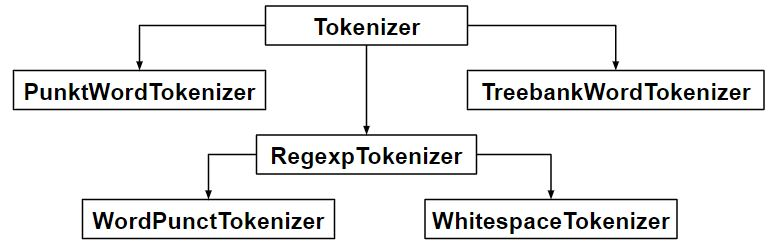

In [38]:
import nltk
# nltk.download()

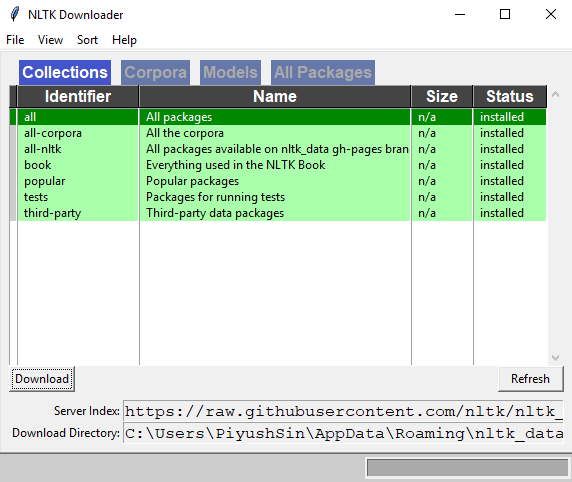

In [39]:
from nltk.tokenize import word_tokenize

word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 '’',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planet',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 '’',
 's',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

_word_tokenize() function is a wrapper function that calls tokenize() on an instance of the TreebankWordTokenizer class._

_These tokenizers work by separating the words using punctuation and spaces. And as mentioned in the code outputs above, it does not discard the punctuation, allowing a user to decide what to do with the punctuations at the time of pre-processing._

In [40]:
from nltk.tokenize import sent_tokenize

sent_tokenize(text)

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on Mars.',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

_The sent_tokenize function uses an instance of __PunktSentenceTokenizer__ from the nltk.tokenize.punkt module, which is already been trained and thus very well knows to mark the end and beginning of sentence at what characters and punctuation._

#### ___spaCy___

_spaCy is an open-source library for advanced Natural Language Processing (NLP). It supports over 49+ languages and provides state-of-the-art computation speed._

```
pip install -U spacy
python -m spacy download en
```

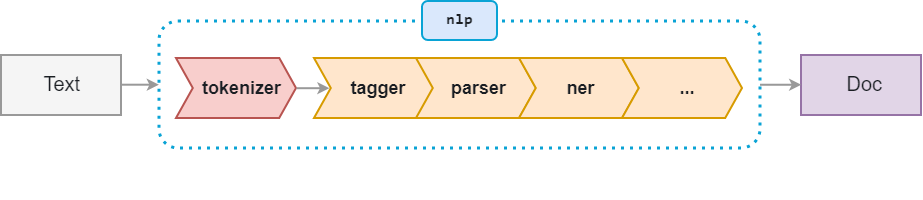

In [41]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

In [42]:
# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
token_list

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 '’s',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 '-',
 'planet',
 '\n',
 'species',
 'by',
 'building',
 'a',
 'self',
 '-',
 'sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 '’s',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 '\n',
 'liquid',
 '-',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

In [43]:
# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
sents_list

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on Mars.',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

___Important: SENTENCE SEGMENTATION in SPACY at the end of this file___

#### ___TextBlob___

_TextBlob module is a Python library and offers a simple API to access its methods and perform basic NLP tasks. It is built on the top of NLTK module._

```pip install -U textblob
python -m textblob.download_corpora
```

In [44]:
# from textblob lib. import TextBlob method 
from textblob import TextBlob 
    
# create a TextBlob object 
blob_object = TextBlob(text) 
  
# tokenize paragraph into words. 
print(" Word Tokenize :\n", blob_object.words) 
  
# tokenize paragraph into sentences. 
print("\n Sentence Tokenize :\n", blob_object.sentences) 

 Word Tokenize :
 ['Founded', 'in', '2002', 'SpaceX', '’', 's', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi-planet', 'species', 'by', 'building', 'a', 'self-sustaining', 'city', 'on', 'Mars', 'In', '2008', 'SpaceX', '’', 's', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth']

 Sentence Tokenize :
 [Sentence("Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars."), Sentence("In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth.")]


#### ___Keras___

```pip install Keras```

_To perform word tokenization using Keras, we use the text_to_word_sequence method from the keras.preprocessing.text class._

In [45]:
# from keras.preprocessing.text import text_to_word_sequence
# 
# # tokenize
# result = text_to_word_sequence(text)
# result

_Keras lowers the case of all the alphabets before tokenizing them. That saves us quite a lot of time._

#### ___Gensim___

_The final tokenization method we will cover here is using the Gensim library. It is an open-source library for unsupervised topic modeling and natural language processing and is designed to automatically extract semantic topics from a given document._

```pip install gensim```

In [46]:
from gensim.utils import tokenize

list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

In [47]:
from gensim.summarization.textcleaner import split_sentences

result = split_sentences(text)
result

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet ',
 'species by building a self-sustaining city on Mars.',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed ',
 'liquid-fuel launch vehicle to orbit the Earth.']

_You might have noticed that Gensim is quite strict with punctuation. It splits whenever a punctuation is encountered. In sentence splitting as well, Gensim tokenized the text on encountering “\n” while other libraries ignored it._

### ___STOPWORDS___

#### ___What are Stopwords?___
_Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document._

_Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc._

#### ___Why do we Need to Remove Stopwords?___
_Removing stopwords is not a hard and fast rule in NLP. It depends upon the task that we are working on. For tasks like text classification, where the text is to be classified into different categories, stopwords are removed or excluded from the given text so that more focus can be given to those words which define the meaning of the text._

_However, in tasks like machine translation and text summarization, removing stopwords is not advisable._

_Here are a few key benefits of removing stopwords:_

* _On removing stopwords, dataset size decreases and the time to train the model also decreases_
* _Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left. Thus, it could increase classification accuracy_
* _Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database_
 
#### ___When Should we Remove Stopwords?___

##### ___Remove Stopwords___
_We can remove stopwords while performing the following tasks:_

* _Text Classification_
* _Spam Filtering_
* _Language Classification_
* _Genre Classification_
* _Caption Generation_
* _Auto-Tag Generation_
 
##### ___Avoid Stopword Removal___
* _Machine Translation_
* _Language Modeling_
* _Text Summarization_
* _Question-Answering problems_


#### ___NLTK___
_NLTK, or the Natural Language Toolkit, is a treasure trove of a library for text preprocessing. It’s one of my favorite Python libraries. NLTK has a list of stopwords stored in 16 different languages._

In [48]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [49]:
word_tokens = word_tokenize(text)

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['Founded', 'in', '2002', ',', 'SpaceX', '’', 's', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi-planet', 'species', 'by', 'building', 'a', 'self-sustaining', 'city', 'on', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 's', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth', '.']
['Founded', '2002', ',', 'SpaceX', '’', 'mission', 'enable', 'humans', 'become', 'spacefaring', 'civilization', 'multi-planet', 'species', 'building', 'self-sustaining', 'city', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 'Falcon', '1', 'became', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'orbit', 'Earth', '.']


#### ___spaCy___
_spaCy is one of the most versatile and widely used libraries in NLP. We can quickly and efficiently remove stopwords from the given text using SpaCy. It has a list of its own stopwords that can be imported as STOP_WORDS from the spacy.lang.en.stop_words class._

In [50]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list)
print(filtered_sentence)   

['Founded', 'in', '2002', ',', 'SpaceX', '’s', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi', '-', 'planet', '\n', 'species', 'by', 'building', 'a', 'self', '-', 'sustaining', 'city', 'on', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’s', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', '\n', 'liquid', '-', 'fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth', '.']
['Founded', '2002', ',', 'SpaceX', 'mission', 'enable', 'humans', 'spacefaring', 'civilization', 'multi', '-', 'planet', '\n', 'species', 'building', 'self', '-', 'sustaining', 'city', 'Mars', '.', '2008', ',', 'SpaceX', 'Falcon', '1', 'privately', 'developed', '\n', 'liquid', '-', 'fuel', 'launch', 'vehicle', 'orbit', 'Earth', '.']


In [51]:
### CUSTOMIZED STOP WORDS ###

text1 = 'This is an example of filtered computing done using spacy.'

customize_stop_words = [
    'computing', 'filtered'
]

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True
    
doc = nlp(text1)
tokens = [token.text for token in doc if not token.is_stop]
print('Original Article: %s' % (text1))
print()
print(tokens)

Original Article: This is an example of filtered computing done using spacy.

['example', 'spacy', '.']


#### ___Gensim___
_Gensim is a pretty handy library to work with on NLP tasks. While pre-processing, gensim provides methods to remove stopwords as well. We can easily import the remove_stopwords method from the class __gensim.parsing.preprocessing__._

_While using gensim for removing stopwords, we can directly use it on the raw text. There’s no need to perform tokenization before removing stopwords. This can save us a lot of time._

In [52]:
from gensim.parsing.preprocessing import remove_stopwords

remove_stopwords(text)

'Founded 2002, SpaceX’s mission enable humans spacefaring civilization multi-planet species building self-sustaining city Mars. In 2008, SpaceX’s Falcon 1 privately developed liquid-fuel launch vehicle orbit Earth.'

### ___STEMMING and LEMMATIZATION___

_Stemming and Lemmatization is simply normalization of words, which means reducing a word to its root form. In most natural languages, a root word can have many variants. For example, the word ‘play’ can be used as ‘playing’, ‘played’, ‘plays’, etc._

#### ___Why do we need to Perform Stemming or Lemmatization?___

_Let’s consider the following two sentences:_

* _He was driving_
* _He went for a drive_

_We can easily state that both the sentences are conveying the same meaning, that is, driving activity in the past. A machine will treat both sentences differently. Thus, to make the text understandable for the machine, we need to perform stemming or lemmatization._

_Another benefit of text normalization is that it __reduces the number of unique words__ in the text data. This helps in __bringing down the training time__ of the machine learning model._

#### ___Stemming___

* _Stemming is a text normalization technique that cuts off the end or beginning of a word by taking into account a list of common prefixes or suffixes that could be found in that word._
* _It is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word._
* _Stemming normalizes the word by truncating the word to its stem word. For example, the words “studies,” “studied,” “studying” will be reduced to “studi,” making all these word forms to refer to only one token. Notice that stemming may not give us a dictionary, grammatical word for a particular set of words._
 
___Errors in Stemming___

_There are mainly two errors in stemming:_

* ___Over-stemming___ _occurs when two words are stemmed to same root that are of different stems. Over-stemming can also be regarded as false-positives._

* ___Under-stemming___ _occurs when two words are stemmed to same root that are not of different stems. Under-stemming can be interpreted as false-negatives._

___Use of Stemming___

* _Stemming is used in information retrieval systems like search engines._
* _It is used to determine domain vocabularies in domain analysis._

#### ___Porter’s Stemmer Algorithm___
_It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes._

_Example: EED -> EE means “if the word has at least one vowel and consonant plus EED ending, change the ending to EE” as ‘agreed’ becomes ‘agree’._

___Advantage___ _: It produces the best output as compared to other stemmers and it has less error rate._

___Limitation___ _:  Morphological variants produced are not always real words._

#### ___Snowball Stemming Algorithm___

_It is another very useful stemming algorithm. It is an advance version of Port Stemmer and preffered. It supports 15 non-English languages._

#### ___Lancaster Stemmer Algorithm___

_The LancasterStemmer is an iterative algorithm with rules saved externally. On each iteration, it tries to find an applicable rule by the last character of the word. Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. Otherwise, the rule is applied, and the process repeats._

_LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning._

In [53]:
from nltk.stem import PorterStemmer

word_tokens = word_tokenize(text) 
    
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

Stem_words = []

ps = PorterStemmer()
for w in filtered_sentence:
    rootWord=ps.stem(w)
    Stem_words.append(rootWord)
    
print(filtered_sentence)
print(Stem_words)

['Founded', '2002', ',', 'SpaceX', '’', 'mission', 'enable', 'humans', 'become', 'spacefaring', 'civilization', 'multi-planet', 'species', 'building', 'self-sustaining', 'city', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 'Falcon', '1', 'became', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'orbit', 'Earth', '.']
['found', '2002', ',', 'spacex', '’', 'mission', 'enabl', 'human', 'becom', 'spacefar', 'civil', 'multi-planet', 'speci', 'build', 'self-sustain', 'citi', 'mar', '.', 'In', '2008', ',', 'spacex', '’', 'falcon', '1', 'becam', 'first', 'privat', 'develop', 'liquid-fuel', 'launch', 'vehicl', 'orbit', 'earth', '.']


In [54]:
from nltk.stem import SnowballStemmer

word_tokens = word_tokenize(text) 
    
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

Stem_words = []

ss = SnowballStemmer(language = "english")
for w in filtered_sentence:
    rootWord=ss.stem(w)
    Stem_words.append(rootWord)
    
print(filtered_sentence)
print(Stem_words)

['Founded', '2002', ',', 'SpaceX', '’', 'mission', 'enable', 'humans', 'become', 'spacefaring', 'civilization', 'multi-planet', 'species', 'building', 'self-sustaining', 'city', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 'Falcon', '1', 'became', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'orbit', 'Earth', '.']
['found', '2002', ',', 'spacex', '’', 'mission', 'enabl', 'human', 'becom', 'spacefar', 'civil', 'multi-planet', 'speci', 'build', 'self-sustain', 'citi', 'mar', '.', 'in', '2008', ',', 'spacex', '’', 'falcon', '1', 'becam', 'first', 'privat', 'develop', 'liquid-fuel', 'launch', 'vehicl', 'orbit', 'earth', '.']


_NOTE: spaCy doesnot have stemming function._

___Other Libraries___ _: pyStemmer, hunspell, Snowball_

#### ___Lemmatization___
_Lemmatization, on the other hand, is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations)._

#### ___Wordnet Lemmatizer - NLTK___

##### ___What is WordNet?___
_Wordnet is an large, freely and publicly available lexical database for the English language aiming to establish structured semantic relationships between words. We can use Wordnet to find meanings of words, synonyms, antonyms, and many
other words. It offers lemmatization capabilities as well and is one of the earliest and most commonly used lemmatizers._

In [55]:
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(text)
print(word_list)

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)

['Founded', 'in', '2002', ',', 'SpaceX', '’', 's', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi-planet', 'species', 'by', 'building', 'a', 'self-sustaining', 'city', 'on', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 's', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth', '.']
Founded in 2002 , SpaceX ’ s mission is to enable human to become a spacefaring civilization and a multi-planet specie by building a self-sustaining city on Mars . In 2008 , SpaceX ’ s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth .


_Sometimes, the same word can have a multiple lemmas based on the meaning / context._

In [56]:
print(lemmatizer.lemmatize("stripes", 'v'))  

strip


In [57]:
print(lemmatizer.lemmatize("stripes", 'n'))

stripe


#### ___Wordnet Lemmatizer with appropriate POS tag___

_It may not be possible manually provide the corrent POS tag for every word for large texts. So, instead, we will find out the correct POS tag for each word, map it to the right input character that the WordnetLemmatizer accepts and pass it as the second argument to lemmatize()._

_In nltk, it is available through the nltk.pos_tag() method. It accepts only a list (list of words), even if its a single word._

In [58]:
print(nltk.pos_tag(['feet']))

[('feet', 'NNS')]


In [59]:
print(nltk.pos_tag(['feet'])[0][1][0])

N


In [60]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])
#> ['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']

['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']


#### ___spaCy Lemmatization___

_spaCy determines the part-of-speech tag by default and assigns the corresponding lemma._

In [61]:
import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

sentence = "The striped bats are hanging on their feet for best"

doc = nlp(sentence)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])

'the striped bat be hang on -PRON- foot for good'

#### ___TextBlob Lemmatizer___

In [62]:
from textblob import TextBlob, Word

# Lemmatize a word
word = 'stripes'
w = Word(word)
w.lemmatize()

'stripe'

In [63]:
# Lemmatize a sentence
sentence = "The striped bats are hanging on their feet for best"
sent = TextBlob(sentence)
" ". join([w.lemmatize() for w in sent.words])

'The striped bat are hanging on their foot for best'

_It did not do a great job at the outset, because, like NLTK, TextBlob also uses wordnet internally. So, let’s pass the appropriate POS tag to the lemmatize() method._

#### ___TextBlob Lemmatizer with appropriate POS tag___

In [64]:
# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

# Lemmatize
sentence = "The striped bats are hanging on their feet for best"
lemmatize_with_postag(sentence)

'The striped bat be hang on their foot for best'

#### ___Pattern Lemmatizer___

In [66]:
import pattern
from pattern.en import lemma, lexeme

sentence = "The striped bats were hanging on their feet and ate best fishes"
" ".join([lemma(wd) for wd in sentence.split()])

'the stripe bat be hang on their feet and eat best fishes'

#### ___Gensim Lemmatize___

_Gensim provide lemmatization facilities based on the pattern package. It can be implemented using the lemmatize() method in the utils module. By default lemmatize() allows only the ‘JJ’, ‘VB’, ‘NN’ and ‘RB’ tags._

In [69]:
from gensim.utils import lemmatize

sentence = "The striped bats were hanging on their feet and ate best fishes"
lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentence)]
lemmatized_out

['striped', 'bat', 'be', 'hang', 'foot', 'eat', 'best', 'fish']

#### ___Which one to prefer (Stemming/Lemmatization)?___

_Stemming algorithm works by cutting the suffix or prefix from the word. Lemmatization is a more powerful operation as it takes into consideration the morphological analysis of the word._

_Lemmatization returns the __lemma__, which is the root word of all its inflection forms._

_We can say that stemming is a quick and dirty method of chopping off words to its root form while on the other hand, lemmatization is an intelligent operation that uses dictionaries which are created by in-depth linguistic knowledge. Hence, __Lemmatization helps in forming better features__._

### ___Common Word Removal___

In [70]:
word_value_counts = pd.Series(' '.join(train['tweet']).split()).value_counts()
word_value_counts

user             17488
the              10150
to                9826
a                 8480
you               6540
                 ...  
needtobetough        1
labicha              1
notsolonely          1
haroldfriday         1
decorazon            1
Length: 43252, dtype: int64

In [71]:
frequent_words = word_value_counts[:20]
frequent_words

user    17488
the     10150
to       9826
a        8480
you      6540
and      6352
i        5762
in       4641
for      4482
is       4177
of       4164
my       3677
this     2669
love     2663
on       2630
with     2512
it       2495
be       2459
day      2218
so       1963
dtype: int64

In [72]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in frequent_words))
train['tweet'].head()

0    when father dysfunctional selfish he drags his...
1    thanks lyft credit cant use cause they dont of...
2                                  bihday your majesty
3                               model take all time ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Rare Word Removal___

In [73]:
rare_words = word_value_counts[-20:]
rare_words

vscocamphotos                  1
pretendingtobe                 1
danielasvillain                1
pigskin                        1
youwin                         1
overcast                       1
gibby                          1
newukulele                     1
tibetan                        1
libelle                        1
tends                          1
teamlewis                      1
nrol37                         1
threemonthstogoamericavegas    1
lifegoeson                     1
needtobetough                  1
labicha                        1
notsolonely                    1
haroldfriday                   1
decorazon                      1
dtype: int64

In [74]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
train['tweet'].head()

0    when father dysfunctional selfish he drags his...
1    thanks lyft credit cant use cause they dont of...
2                                  bihday your majesty
3                               model take all time ur
4                    factsguide society now motivation
Name: tweet, dtype: object

### ___Spelling Correction___

#### ___TextBlob___

In [75]:
from textblob import TextBlob

train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    when father dysfunctional selfish he drags his...
1    thanks left credit can use cause they dont off...
2                                  midday your majesty
3                               model take all time or
4                    factsguide society now motivation
Name: tweet, dtype: object

#### ___pyspellchecker___

```pip install pyspellchecker```

In [79]:
from spellchecker import SpellChecker 
  
spell = SpellChecker() 
  
# find those words that may be misspelled 
misspelled = spell.unknown(["cmputr", "watr", "study", "wrte"]) 
  
for word in misspelled: 
    # Get the one `most likely` answer 
    print(spell.correction(word)) 
  
    # Get a list of `likely` options 
    print(spell.candidates(word)) 

water
{'war', 'warr', 'watt', 'wat', 'wart', 'wath', 'water'}
write
{'arte', 'rte', 'wre', 'wroe', 'wrote', 'write'}
computer
{'impute', 'computer', 'compute', 'computor', 'caputs', 'caput'}


#### ___Autocorrect___

```pip install autocorrect```

In [80]:
from autocorrect import Speller

spell = Speller(lang='en')

print (spell('caaaar'))
print (spell('mussage'))
print (spell('survice'))
print (spell('hte'))

caesar
message
service
the


## ___Few Terminology___

* ___Token___ _: A word, punctuation mark etc. in context, including its attributes, tags and dependencies._


* ___Lexeme___ _: A “word type” with no context. Includes the word shape and flags, e.g. if it’s lowercase, a digit or punctuation._


* ___Doc___ _: A processed container of tokens in context._


* ___Vocab___ _: The collection of lexemes._


* ___StringStore___ _: The dictionary mapping hash values to strings, for example 3197928453018144401 → “coffee”._

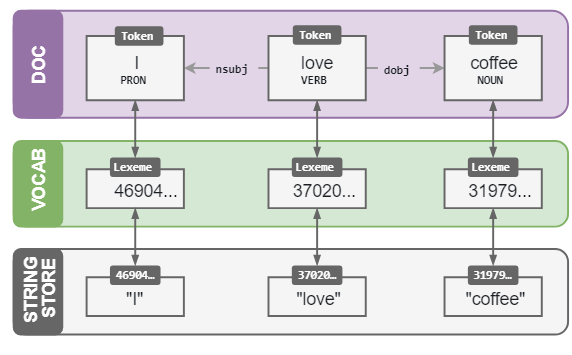

* ___Corpus___ _: A corpus is a language resource consisting of large and structured set of machine-readable texts that have been produced in a natural communicative setting. Its plural is corpora. They can be derived in different ways like text that was originally electronic, transcripts of spoken language and optical character recognition, etc._

## ___Sentence Segmentation in spaCy___

_Sentence segmentation is the process of determining the longer processing units consisting of one or more words. This task involves identifying sentence boundaries between words in different sentences._

_In **spaCy Basics** we saw briefly how Doc objects are divided into sentences. In this section we'll learn how sentence segmentation works, and how to set our own segmentation rules._

In [81]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [82]:
# From Spacy Basics:
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


### ___`Doc.sents` is a generator___
_It is important to note that `doc.sents` is a *generator*. That is, a Doc is not segmented until `doc.sents` is called. This means that, where you could print the second Doc token with `print(doc[1])`, you can't call the "second Doc sentence" with `print(doc.sents[1])`:_

In [83]:
print(doc[1])

is


In [84]:
print(doc.sents[1])

TypeError: 'generator' object is not subscriptable

In [85]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

In [86]:
# Now you can access individual sentences:
print(doc_sents[1])

This is another sentence.


### ___`sents` are Spans___
_At first glance it looks like each `sent` contains text from the original Doc object. In fact they're just Spans with start and end token pointers._

In [87]:
type(doc_sents[1])

spacy.tokens.span.Span

In [88]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


### ___Adding Rules___
_spaCy's built-in `sentencizer` relies on the dependency parse and end-of-sentence punctuation to determine segmentation rules. We can add rules of our own, but they have to be added *before* the creation of the Doc object, as that is where the parsing of segment start tokens happens:_

In [89]:
# Parsing the segmentation start tokens happens during the nlp pipeline
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')

for token in doc2:
    print(token.is_sent_start, ' '+token.text)

True  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .


_Notice we haven't run doc2.sents, and yet token.is_sent_start was set to True on two tokens in the Doc._

_Let's add a semicolon to our existing segmentation rules. That is, whenever the sentencizer encounters a semicolon, the next token should start a new segment._

In [90]:
# SPACY'S DEFAULT BEHAVIOR
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [91]:
# ADD A NEW RULE TO THE PIPELINE
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe(set_custom_boundaries, before='parser')

nlp.pipe_names

['tagger', 'set_custom_boundaries', 'parser', 'ner']

_The new rule has to run before the document is parsed. Here we can either pass the argument before='parser' or first=True._

In [92]:
# Re-run the Doc object creation:
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc4.sents:
    print(sent)

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


In [93]:
# And yet the new rule doesn't apply to the older Doc object:
for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


### ___Why not change the token directly?___
_Why not simply set the `.is_sent_start` value to True on existing tokens?_

In [94]:
# Find the token we want to change:
doc3[7]

leadership

In [95]:
# Try to change the .is_sent_start attribute:
doc3[7].is_sent_start = True

ValueError: [E043] Refusing to write to token.sent_start if its document is parsed, because this may cause inconsistent state.

_spaCy refuses to change the tag after the document is parsed to prevent inconsistencies in the data._

### ___Changing the Rules___
_In some cases we want to *replace* spaCy's default sentencizer with our own set of rules. In this section we'll see how the default sentencizer breaks on periods. We'll then replace this behavior with a sentencizer that breaks on linebreaks._

In [96]:
nlp = spacy.load('en_core_web_sm')  # reset to the original

mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."

# SPACY DEFAULT BEHAVIOR:
doc = nlp(mystring)

for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.']
['This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n', 'third', 'sentence', '.']


In [97]:
# CHANGING THE RULES
from spacy.pipeline import SentenceSegmenter

def split_on_newlines(doc):
    start = 0
    seen_newline = False
    for word in doc:
        if seen_newline:
            yield doc[start:word.i]
            start = word.i
            seen_newline = False
        elif word.text.startswith('\n'): # handles multiple occurrences
            seen_newline = True
    yield doc[start:]      # handles the last group of tokens


sbd = SentenceSegmenter(nlp.vocab, strategy=split_on_newlines)
nlp.add_pipe(sbd)

_While the function `split_on_newlines` can be named anything we want, it's important to use the name `sbd` for the SentenceSegmenter._

In [98]:
doc = nlp(mystring)
for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.', 'This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n']
['third', 'sentence', '.']
